In [12]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [22]:
train = pd.read_csv('/Users/juhyeon/python-workspace/train.csv')
test = pd.read_csv('/Users/juhyeon/python-workspace/test.csv')

 - id : 날짜와 시간별 id
 - hour_bef_temperature : 1시간 전 기온
 - hour_bef_precipitation : 1시간 전 비 정보, 비가 오지 않았으면 0, 비가 오면 1
 - hour_bef_windspeed : 1시간 전 풍속(평균)
 - hour_bef_humidity : 1시간 전 습도
 - hour_bef_visibility : 1시간 전 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
 - hour_bef_ozone : 1시간 전 오존
 - hour_bef_pm10 : 1시간 전 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
 - hour_bef_pm2.5 : 1시간 전 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
 - count : 시간에 따른 따릉이 대여 수

In [23]:
train.head(10)

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
5,13,2,13.6,0.0,1.7,80.0,1073.0,0.027,34.0,15.0,39.0
6,14,3,10.6,0.0,1.5,58.0,1548.0,0.038,62.0,33.0,23.0
7,16,21,16.0,0.0,6.0,21.0,1961.0,0.050,90.0,28.0,146.0
8,19,9,13.8,0.0,1.9,64.0,1344.0,0.039,93.0,19.0,39.0
9,20,14,17.2,0.0,2.1,32.0,1571.0,0.025,64.0,19.0,83.0


In [24]:
train.tail(5)

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0
1458,2179,17,21.1,0.0,3.1,47.0,1973.0,0.046,38.0,17.0,170.0


In [25]:
test.head(10)

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0
5,10,9,20.2,0.0,4.3,39.0,2000.0,0.034,22.0,7.0
6,11,18,19.0,0.0,2.7,80.0,2000.0,0.028,17.0,12.0
7,12,18,31.2,0.0,2.2,42.0,621.0,0.117,94.0,69.0
8,15,6,20.1,0.0,0.8,78.0,463.0,0.026,57.0,33.0
9,17,8,17.0,1.0,0.9,100.0,200.0,0.022,12.0,12.0


In [26]:
test.tail(5)

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
710,2148,1,24.6,0.0,2.4,60.0,1745.0,NaN,NaN,NaN
711,2149,1,18.1,0.0,1.0,55.0,2000.0,NaN,NaN,NaN
712,2165,9,23.3,0.0,2.3,66.0,1789.0,0.020,17.0,15.0
713,2166,16,27.0,0.0,1.6,46.0,1956.0,0.032,40.0,26.0
714,2177,8,22.3,0.0,1.0,63.0,1277.0,0.007,30.0,24.0


In [28]:
# (행의개수, 열의개수)

print(train.shape)
print(test.shape)

(1459, 11)
(715, 10)


In [29]:
# data set의 column별 정보확인. null값 확인.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


In [32]:
# train dataset의 기술 통계량: 해당 column을 대표할 수 있는 통계값들을 의미
## count(해당 column에서 비어있지 않은 값의 개수)
## std(표준편차), 25%(Q1, 아래에서 부터 1/4번째 지점에 있는 값)

In [33]:
train.describe() 

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [34]:
test.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
count,715.000000,715.000000,714.000000,714.000000,714.000000,714.000000,714.000000,680.000000,678.000000,679.000000
mean,1056.854545,11.472727,23.263305,0.051821,2.388515,56.668067,1359.494398,0.041196,36.930678,24.939617
std,625.574471,6.928427,4.039645,0.221820,1.171270,19.661880,614.171870,0.020656,12.641503,10.075857
min,0.000000,0.000000,14.600000,0.000000,0.000000,16.000000,126.000000,0.003000,9.000000,7.000000
25%,507.000000,5.500000,20.300000,0.000000,1.500000,42.000000,807.250000,0.027000,28.000000,17.000000
50%,1046.000000,11.000000,22.900000,0.000000,2.300000,55.000000,1489.000000,0.039000,35.000000,24.000000
75%,1616.500000,17.000000,26.375000,0.000000,3.275000,73.750000,2000.000000,0.052250,45.000000,31.000000
max,2177.000000,23.000000,33.800000,1.000000,5.900000,100.000000,2000.000000,0.138000,94.000000,69.000000


In [35]:
# 시간별 항목에 대한 평균값 구하기
train.groupby('hour').mean()

,id,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
hour,,,,,,,,,,
0,1200.016667,14.788136,0.016949,1.965517,58.169492,1434.220339,0.033763,55.881356,30.982759,71.766667
1,1074.918033,14.155738,0.049180,1.836667,60.459016,1400.852459,NaN,NaN,NaN,47.606557
2,1077.885246,13.747541,0.049180,1.633333,61.721311,1374.278689,0.030492,58.475410,31.366667,31.409836
3,1146.704918,13.357377,0.032787,1.620000,63.131148,1326.311475,0.031213,59.180328,31.466667,21.377049
4,1194.786885,13.001639,0.016393,1.409836,64.573770,1264.606557,0.031984,58.278689,32.116667,13.524590
5,1091.819672,12.673770,0.016393,1.296721,66.000000,1203.426230,0.031623,56.721311,31.525424,13.114754
6,1112.393443,12.377049,0.016393,1.331148,67.409836,1146.229508,0.029317,56.150000,31.603448,24.557377
7,1086.262295,12.191803,0.016393,1.262295,67.934426,1150.311475,0.025300,56.533333,31.779661,62.360656
8,1086.491803,12.600000,0.032787,1.632787,64.049180,1152.868852,0.021197,57.918033,31.796610,136.688525


In [37]:
# 시간별 대여량(count)의 평균. -> 위 결과에서 count값만 확인됨.

train.groupby('hour').mean()['count']

hour
0      71.766667
1      47.606557
2      31.409836
3      21.377049
4      13.524590
5      13.114754
6      24.557377
7      62.360656
8     136.688525
9      93.540984
10     78.803279
11     88.327869
12    111.901639
13    120.050000
14    134.590164
15    152.967213
16    169.100000
17    187.133333
18    262.163934
19    201.606557
20    164.868852
21    168.816667
22    148.245902
23    103.852459
Name: count, dtype: float64

In [40]:
import matplotlib.pyplot as plt

<Axes: xlabel='hour'>

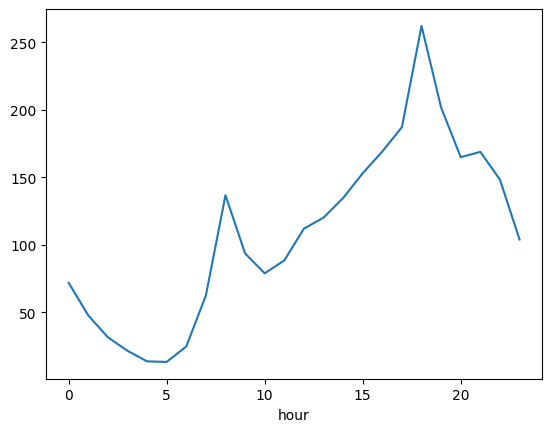

In [41]:
# 시간별 대여량 평균 시각화
train.groupby('hour').mean()['count'].plot()

In [44]:
# 문자열: 
blue	b
green	g
red	r
cyan	c
magenta	m
yellow	y
black	k
white	w

# 마커:
.	점
o	원
v	역삼각형
^	삼각형
s	사각형
*	별
x	엑스
d	다이아몬드

# 문자열:
-	실선
--	끊어진 실선
-.	점+실선
:	점선

SyntaxError: invalid syntax (1090452978.py, line 2)

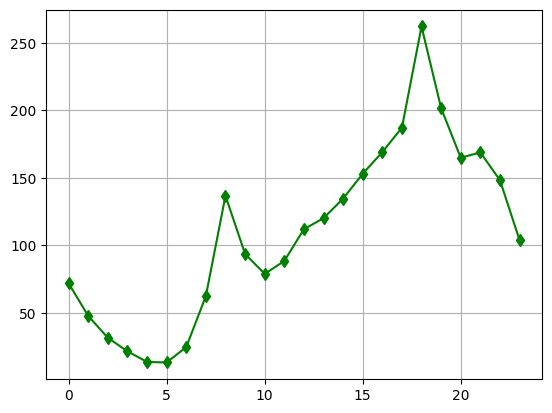

In [43]:
plt.plot(train.groupby('hour').mean()['count'], 'gd-')
plt.grid()

Text(0, 0.5, 'Count')

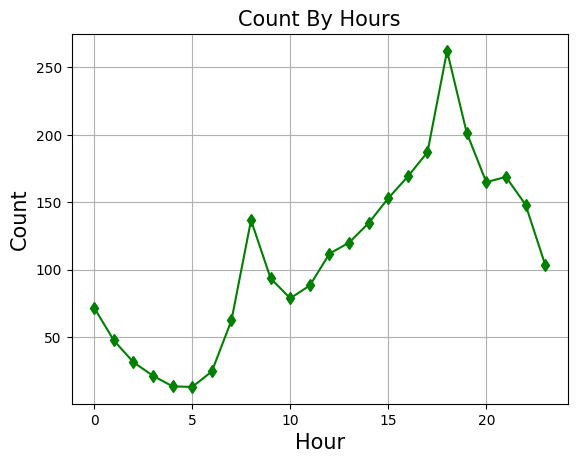

In [45]:
plt.plot(train.groupby('hour').mean()['count'], 'gd-')
plt.grid()  # 보조선

plt.title('Count By Hours', fontsize = 15)  # 그래프제목
plt.xlabel('Hour', fontsize = 15)   # x축 이름설정
plt.ylabel('Count', fontsize = 15)  # y축 이름설정

# plt.savefig('picture,png) -> 그래프를 이미지로 저장!!

Text(18, 120, 'leave work')

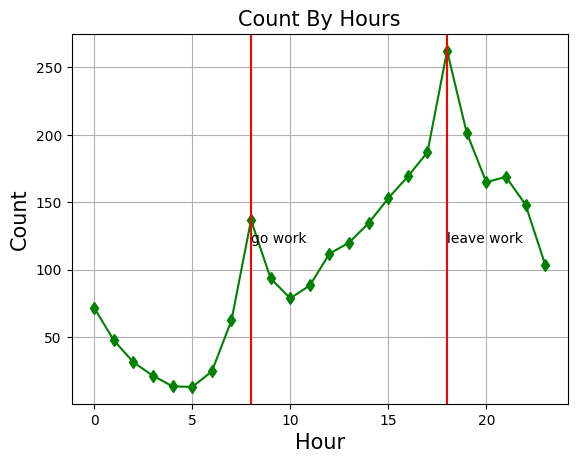

In [46]:
plt.plot(train.groupby('hour').mean()['count'], 'gd-')
plt.grid()

plt.title('Count By Hours', fontsize = 15)  
plt.xlabel('Hour', fontsize = 15)   
plt.ylabel('Count', fontsize = 15)

plt.axvline(8, color = 'r')  # plt.avxline(x, color) : 원하는위치(x)에 세로선 생성
plt.axvline(18, color = 'r')

plt.text(8, 120, 'go work', fontsize = 10) # plt.text(x, y, text, fontsize) : 원하는 위치(x,y)에 text 생성
plt.text(18, 120, 'leave work', fontsize = 10)

In [49]:
import seaborn as sns

<Axes: >

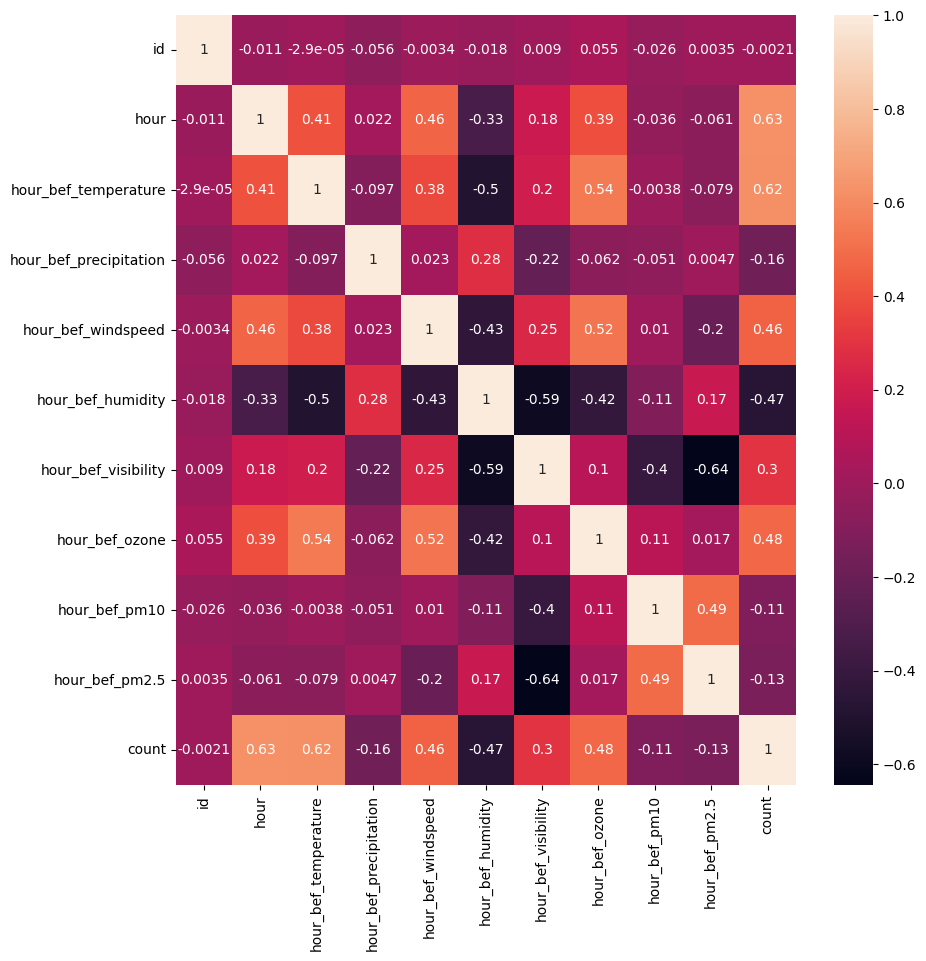

In [54]:
# train 데이터의 correlation coefficient를 heatmap으로 확인

plt.figure(figsize = (10, 10))  # 이미지 크기 늘림.
sns.heatmap(train.corr(), annot = True) # count 열을 보았을 때, 상관계수가 높은 변수들을 채택해 모델 생성.

In [55]:
# 결측치여부 확인, .isna() 와 .isnull() 같음!!
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [58]:
# 'hour_bef_temperature'의 결측치행 출력. 밤12시(934)와 오후6시(1035)의 값이 비어있음. 
# 온도는 평균값으로 결측치를 채우면 해당 시간의 특성을 반영하지 못할것임.

train[train['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


<Axes: xlabel='hour'>

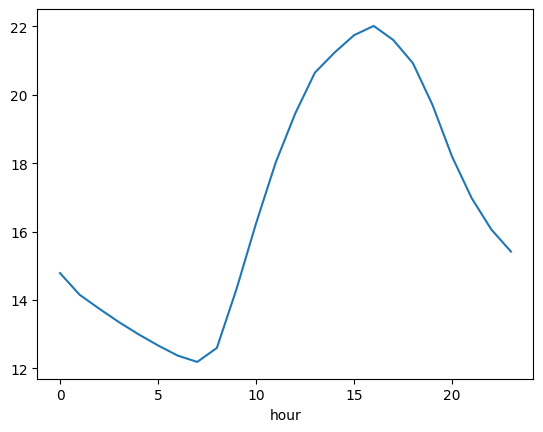

In [59]:
# 시간별 'hour_bef_temperature'의 평균을 plot으로 나타냄. (시간별 온도 평균)
train.groupby('hour').mean()['hour_bef_temperature'].plot()

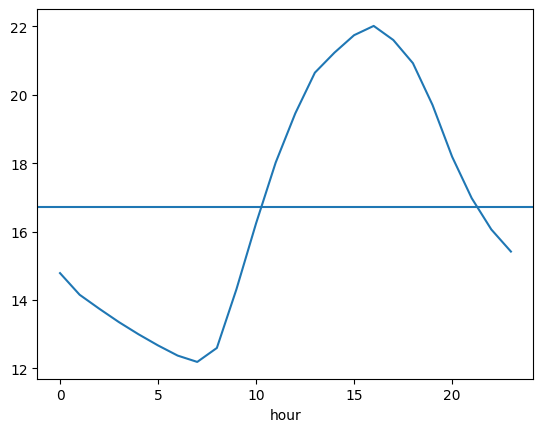

In [61]:
train.groupby('hour').mean()['hour_bef_temperature'].plot()

# 전체 시간에 대한 평균 온도(가로선)을 추가하자.
plt.axhline(train.groupby('hour').mean()['hour_bef_temperature'].mean())

In [62]:
# 시간별 train의 평균온도
train.groupby('hour').mean()['hour_bef_temperature']

hour
0     14.788136
1     14.155738
2     13.747541
3     13.357377
4     13.001639
5     12.673770
6     12.377049
7     12.191803
8     12.600000
9     14.318033
10    16.242623
11    18.019672
12    19.457377
13    20.648333
14    21.234426
15    21.744262
16    22.015000
17    21.603333
18    20.926667
19    19.704918
20    18.191803
21    16.978333
22    16.063934
23    15.418033
Name: hour_bef_temperature, dtype: float64

In [63]:
# 값이 없는 934(0시), 1035(18시) 행에 시간별로 구한 평균치를 각각 넣어줌
# .fillna({넣을곳:넣을값, 넣을곳2:넣을값2, ...}, inplace = True}) -> inplace = True를 사용해야 값이 저장됨.

train['hour_bef_temperature'].fillna({934:14.788136, 1035:20.926667}, inplace = True)

In [65]:
# train 데이터에서 해당하는 행의 정보 확인. <<< .loc[[확인할행, 확인할행2, ... ], :] >>>
train.loc[[934, 1035], :]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,14.788136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [66]:
# 'hour_bef_temperature'에 더 이상의 결측치 값이 없는 것 확인!
train[train['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count


In [67]:
# 'hour_bef_windspeed'의 결측치 확인.
train[train['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
18,33,13,22.600000,0.0,NaN,41.0,987.0,0.046,64.0,39.0,208.0
244,381,1,14.100000,0.0,NaN,55.0,1992.0,NaN,NaN,NaN,38.0
260,404,3,14.000000,0.0,NaN,50.0,2000.0,0.049,35.0,22.0,17.0
376,570,0,14.300000,0.0,NaN,49.0,2000.0,0.044,37.0,20.0,58.0
780,1196,20,16.500000,0.0,NaN,31.0,2000.0,0.058,39.0,18.0,181.0
934,1420,0,14.788136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1138,1717,12,21.400000,0.0,NaN,44.0,1375.0,0.044,61.0,37.0,116.0
1229,1855,2,14.000000,0.0,NaN,52.0,2000.0,0.044,37.0,20.0,20.0


<Axes: xlabel='hour'>

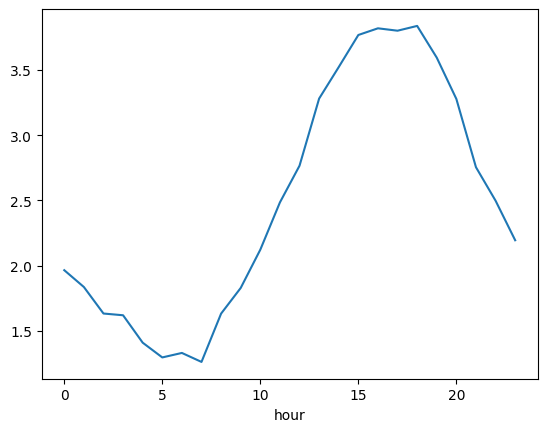

In [68]:
# train 데이터의 'hour_bef_windespeed'의 mean을 구해서 시간별로 묶어서 plot 해라.
train.groupby('hour').mean()['hour_bef_windspeed'].plot()

In [69]:
train.groupby('hour').mean()['hour_bef_windspeed']

hour
0     1.965517
1     1.836667
2     1.633333
3     1.620000
4     1.409836
5     1.296721
6     1.331148
7     1.262295
8     1.632787
9     1.829508
10    2.122951
11    2.485246
12    2.766667
13    3.281356
14    3.522951
15    3.768852
16    3.820000
17    3.801667
18    3.838333
19    3.595082
20    3.278333
21    2.755000
22    2.498361
23    2.195082
Name: hour_bef_windspeed, dtype: float64

In [70]:
# 'hour_bef_windspeed'의 결측치에 해당하는 index값 확인.
train[train['hour_bef_windspeed'].isna()].index

Index([18, 244, 260, 376, 780, 934, 1035, 1138, 1229], dtype='int64')

In [77]:
train['hour_bef_windspeed'].fillna({18:3.281356, 244:1.836667, 260:1.620000, 376:1.965517, 780:3.278333, 934:1.965517, 1035:3.838333, 1138:2.766667, 1229:1.633333}, inplace=True)
}, inplace = True)

SyntaxError: unmatched '}' (3384015162.py, line 2)

In [79]:
train.loc[[18, 244, 260, 376, 780, 934, 1035, 1138, 1229], :]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
18,33,13,22.600000,0.0,3.281356,41.0,987.0,0.046,64.0,39.0,208.0
244,381,1,14.100000,0.0,1.836667,55.0,1992.0,NaN,NaN,NaN,38.0
260,404,3,14.000000,0.0,1.620000,50.0,2000.0,0.049,35.0,22.0,17.0
376,570,0,14.300000,0.0,1.965517,49.0,2000.0,0.044,37.0,20.0,58.0
780,1196,20,16.500000,0.0,3.278333,31.0,2000.0,0.058,39.0,18.0,181.0
934,1420,0,14.788136,NaN,1.965517,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,3.838333,NaN,NaN,NaN,NaN,NaN,1.0
1138,1717,12,21.400000,0.0,2.766667,44.0,1375.0,0.044,61.0,37.0,116.0
1229,1855,2,14.000000,0.0,1.633333,52.0,2000.0,0.044,37.0,20.0,20.0


In [115]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      2
hour_bef_windspeed          0
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [119]:
# train 데이터의 'hour_bef_precipitation' 934, 1035행에 결측치 있는 것 확인
train[train['hour_bef_precipitation'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,14.788136,NaN,1.965517,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,3.838333,NaN,NaN,NaN,NaN,NaN,1.0


In [116]:
# hour에 따라서 'hour_bef_precipitation' 평균구함.
train.groupby('hour').mean()['hour_bef_precipitation']

hour
0     0.016949
1     0.049180
2     0.049180
3     0.032787
4     0.016393
5     0.016393
6     0.016393
7     0.016393
8     0.032787
9     0.016393
10    0.016393
11    0.000000
12    0.016393
13    0.016667
14    0.065574
15    0.065574
16    0.050000
17    0.100000
18    0.016667
19    0.032787
20    0.049180
21    0.016667
22    0.032787
23    0.016393
Name: hour_bef_precipitation, dtype: float64

In [122]:
# 비어있던 train-'hour_bef_precipitation' 934, 1035행에 평균값 넣음.
train['hour_bef_precipitation'].fillna({934:0.016949, 1035:0.016667}, inplace = True)
train[train['hour_bef_precipitation'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count


In [123]:
# train 데이터에서 사용할 'hour','hour_bef_temperature','hour_bef_precipitation','hour_bef_windspeed'에 결측치 없는 것 확인.
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      0
hour_bef_windspeed          0
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [81]:
# test 데이터의 결측치 확인. 
# .isna() - 결측값확인 / .sum() - 비어있는곳 모두더함
test.isna().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [82]:
# test 데이터 'hour_bef_temperature'의 653행에 결측치가 있는 것 확인.
test[test['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
test.groupby('hour').mean()['hour_bef_temperature']

hour
0     21.386667
1     20.986667
2     20.600000
3     20.203333
4     19.853333
5     19.634483
6     19.243333
7     19.190000
8     19.846667
9     21.266667
10    22.683333
11    24.110000
12    25.430000
13    26.630000
14    27.473333
15    28.040000
16    28.255172
17    27.848276
18    27.010345
19    26.110345
20    24.803333
21    23.696552
22    22.523333
23    21.926667
Name: hour_bef_temperature, dtype: float64

In [87]:
# 비어있는 653행에 시간에따른 'hour_bef_temperature'평균값을 넣어줌.
test['hour_bef_temperature'].fillna({653:26.110345}, inplace = True)
test[test['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5


In [88]:
# test 데이터 'hour_bef_windspeed'의 653행에 결측치가 있는 것 확인.
test[test['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,26.110345,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
# 'hour_bef_windspeed'의 평균값을 'hour'로 묶음
test.groupby('hour').mean()['hour_bef_windspeed']

hour
0     1.986667
1     1.840000
2     1.823333
3     1.636667
4     1.543333
5     1.589655
6     1.396667
7     1.453333
8     1.446667
9     1.646667
10    1.920000
11    2.186667
12    2.636667
13    2.836667
14    2.903333
15    3.140000
16    3.406897
17    3.558621
18    3.503448
19    3.541379
20    3.406667
21    3.041379
22    2.686667
23    2.336667
Name: hour_bef_windspeed, dtype: float64

In [90]:
# 653행의 비어있던 'hour_bef_windspeed'값을 채워줌
test['hour_bef_windspeed'].fillna({653:3.541379}, inplace = True)

In [93]:
# 653행에 'hour_bef_pricipitation'이 비어있는 것 확인.
test[test['hour_bef_precipitation'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,26.110345,NaN,3.541379,NaN,NaN,NaN,NaN,NaN


In [92]:
test.groupby('hour').mean()['hour_bef_precipitation']

hour
0     0.033333
1     0.066667
2     0.066667
3     0.033333
4     0.033333
5     0.034483
6     0.100000
7     0.100000
8     0.100000
9     0.033333
10    0.033333
11    0.066667
12    0.000000
13    0.033333
14    0.033333
15    0.000000
16    0.000000
17    0.000000
18    0.137931
19    0.068966
20    0.066667
21    0.068966
22    0.066667
23    0.066667
Name: hour_bef_precipitation, dtype: float64

In [94]:
# 'hour_bef_precipitation'에 비어있는 653행의 값을 채워줌.
test['hour_bef_precipitation'].fillna({653:0.068966}, inplace = True)

In [95]:
# 값이 채워져서 'hour_bef_precipitation'에는 결측치가 없음.
test[test['hour_bef_precipitation'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5


In [97]:
# 이용하고자 하는 'hour','hour_bef_temperature','hour_bef_precipitation','hour_bef_windspeed'는 다 채워짐!
test.isna().sum()

id                         0
hour                       0
hour_bef_temperature       0
hour_bef_precipitation     0
hour_bef_windspeed         0
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [124]:
features = ['hour', 'hour_bef_temperature', 'hour_bef_precipitation','hour_bef_windspeed']
x_train = train[features]

y_train = train['count']  # train 데이터의 'count'값을 가져옴(count: 따릉이 대여량)

x_test = test[features]

In [125]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(1459, 4)
(1459,)
(715, 4)


In [126]:
# hyperparameter
# n_estimators: 트리개수
# n_jobs: 사용할 cpu개수 (-1로 하면 가장 많은 cpu를 사용하게 됨.)
# max_depth: 모델 overfitting 방지 위해서 깊이 설정
# random_state: random 성질을 고정시킴.

# 해당 데이터에 가장 적합한 hyparameter 옵션을 찾는 과정 -> tuning
# Decision Tree 모델을 여러 개 모아서 만든 것 = Random Forest
model_100 = RandomForestRegressor(n_estimators=100, random_state=0)
model_100_5 = RandomForestRegressor(n_estimators=100, max_depth = 5, random_state=0)
model_200 = RandomForestRegressor(n_estimators=200) 

In [127]:
# DecisionTreeClassifier 모델 활용

import sklearn
from sklearn.tree import DecisionTreeClassifier

model_dtc = DecisionTreeClassifier(random_state = 0)
model_dtr = DecisionTreeRegressor()

In [128]:
# model.fit() : 모델학습
# parameter가 설정된 모델에 train data 넣어서 학습진행.

model_100.fit(x_train, y_train)
model_100_5.fit(x_train, y_train)
model_200.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200)

In [129]:
# 모델을 통과한 데이터를 decisiontreeregressor에 학습..?

model_dtc.fit(x_train, y_train)
model_dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [130]:
pred1 = model_100.predict(x_test)
pred2 = model_100_5.predict(x_test)
pred3 = model_200.predict(x_test)

In [132]:
pred4 = model_dtc.predict(x_test)
pred5 = model_dtr.predict(x_test)

In [ ]:
# submission 파일 없음ㅠㅠ
submission = pd.read_csv('/Users/juhyeon/python-workspace/submission.csv')

In [ ]:
# 파일.to_csv('저장할이름', index=False) : 결과로 submission.csv 파일에 예측결과 저장
submission['count'] = pred1
submission.to_csv('model_100.csv', index=False)

In [ ]:
submission['count'] = pred2
submission.to_csv('model_100_5.csv', index=False)

In [ ]:
submission['count'] = pred3
submission.to_csv('model_200.csv', index=False)

In [ ]:
submission['count'] = pred4
submission.to_csv('model_dtc.csv', index=False)

In [ ]:
submission['count'] = pred5
submission.to_csv('model_dtr.csv', index=False)